# Importing libraries

Main libraries

In [81]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Sklearn tools

In [82]:
# Categorical Features encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,  LabelEncoder

# Feature scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import  minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Pipline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Ensempling models
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor,HistGradientBoostingRegressor


# Loss function 
from sklearn.metrics import mean_squared_error

# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Get Diamonds Dataset

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
train_path = "./drive/MyDrive/diamonds/train.csv"
test_path = "./drive/MyDrive/diamonds/test.csv"
diamonds = pd.DataFrame(pd.read_csv(train_path))
test = pd.DataFrame(pd.read_csv(test_path))
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


# Data checking

In [85]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [86]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We note that there are at least one zero value in every single columns of ["x","y","z"], so we need to replace sparce features with nan value to estimate them later.

In [87]:
diamonds = diamonds.applymap(lambda x: np.NaN if x==0 else x)

In [88]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43033 non-null  float64
 9   y           43034 non-null  float64
 10  z           43023 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


Checking Categorical Features values and their frequency

In [89]:
print("<<<<<<<<<<<<<<<<<<<<<<cut values>>>>>>>>>>>>>>>>>>>>>>>>>")
print(diamonds["cut"].value_counts())
print("\n<<<<<<<<<<<<<<<<<<<<<<color values>>>>>>>>>>>>>>>>>>>>>>>>>")
print(diamonds["color"].value_counts())
print("\n<<<<<<<<<<<<<<<<<<<<<<clarity values>>>>>>>>>>>>>>>>>>>>>>>>>")
print(diamonds["clarity"].value_counts())

<<<<<<<<<<<<<<<<<<<<<<cut values>>>>>>>>>>>>>>>>>>>>>>>>>
Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

<<<<<<<<<<<<<<<<<<<<<<color values>>>>>>>>>>>>>>>>>>>>>>>>>
G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

<<<<<<<<<<<<<<<<<<<<<<clarity values>>>>>>>>>>>>>>>>>>>>>>>>>
SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64


# Ploting Data:

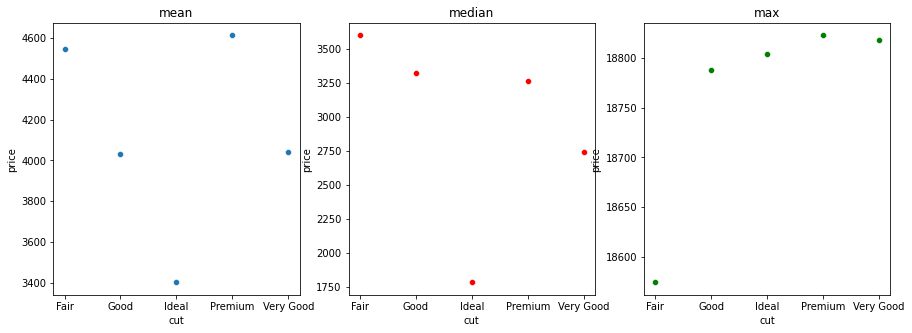

In [90]:
max_per_cut = diamonds.groupby("cut").max()
mean_per_cut = diamonds.groupby("cut").mean()
median_per_cut = diamonds.groupby("cut").median()

fig,ax = plt.subplots(1,3,figsize=(15, 5))
sns.scatterplot(data = mean_per_cut, x = "cut", y = "price", ax = ax[0])
ax[0].set_title("mean")
sns.scatterplot(data = median_per_cut, x = "cut",y = "price", color = "r", ax = ax[1])
ax[1].set_title("median")
sns.scatterplot(data = max_per_cut, x = "cut", y = "price", color = "g", ax = ax[2])
ax[2].set_title("max")
plt.show()

In [91]:
median_per_cut

,Unnamed: 0,carat,depth,table,price,x,y,z
cut,,,,,,,,
Fair,17118.0,1.00,65.0,58.0,3597.0,6.22,6.16,4.02
Good,20544.0,0.90,63.4,58.0,3321.0,6.07,6.08,3.78
Ideal,31156.0,0.53,61.8,56.0,1781.0,5.23,5.24,3.22
Premium,24635.0,0.90,61.4,59.0,3260.0,6.14,6.09,3.74
Very Good,24464.0,0.73,62.1,58.0,2739.0,5.79,5.82,3.59


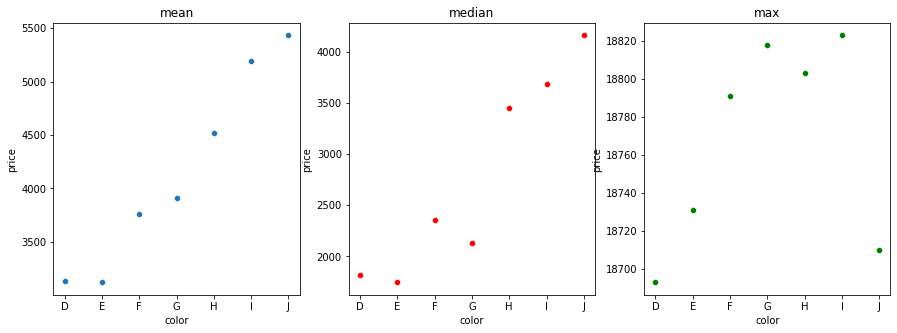

In [92]:
max_per_color = diamonds.groupby("color").max()
mean_per_color = diamonds.groupby("color").mean()
median_per_color = diamonds.groupby("color").median()

fig,ax = plt.subplots(1,3,figsize=(15, 5))
sns.scatterplot(data = mean_per_color, x = "color", y = "price", ax = ax[0])
ax[0].set_title("mean")
sns.scatterplot(data = median_per_color, x = "color",y = "price", color = "r", ax = ax[1])
ax[1].set_title("median")
sns.scatterplot(data = max_per_color, x = "color", y = "price", color = "g", ax = ax[2])
ax[2].set_title("max")
plt.show()

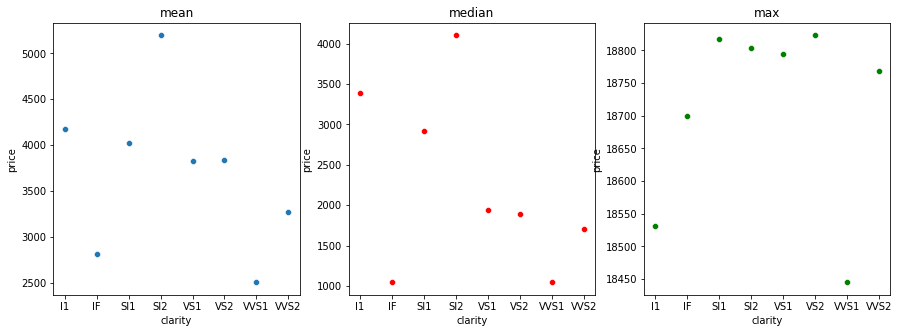

In [93]:
max_per_clarity = diamonds.groupby("clarity").max()
mean_per_clarity = diamonds.groupby("clarity").mean()
median_per_clarity = diamonds.groupby("clarity").median()

fig,ax = plt.subplots(1,3,figsize=(15, 5))
sns.scatterplot(data = mean_per_clarity, x = "clarity", y = "price", ax = ax[0])
ax[0].set_title("mean")
sns.scatterplot(data = median_per_clarity, x = "clarity",y = "price", color = "r", ax = ax[1])
ax[1].set_title("median")
sns.scatterplot(data = max_per_clarity, x = "clarity", y = "price", color = "g", ax = ax[2])
ax[2].set_title("max")
plt.show()

In [94]:
display(diamonds[diamonds["x"].isnull()])
display(diamonds[diamonds["y"].isnull()])
display(diamonds[diamonds["z"].isnull()])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
9130,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
9722,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
12918,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
19640,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
22050,27430,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
39924,49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
39925,49558,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
9722,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
12918,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
19640,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
22050,27430,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
39924,49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
39925,49558,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1702,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,NaN
1787,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,NaN
4373,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,NaN
8300,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,NaN
9130,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
9722,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
12918,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
19546,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,NaN
19640,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
20925,26124,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,NaN


First we assume x = y ,beacuse i'd taken a look on the width to length ratios and see that it the megority of it has 1:1 ratio which refer to rounded shape, then we compute z (Nan values) by using the total depth percentage formula.

In [95]:
diamonds["x"] = np.where((diamonds["x"].isna()) & (~diamonds["y"].isna()),diamonds["y"],diamonds["x"])
diamonds["y"] = np.where((~diamonds["x"].isna()) & (diamonds["y"].isna()),diamonds["x"],diamonds["y"])
diamonds["z"] = np.where((~diamonds["x"].isna()) & (~diamonds["y"].isna())& (diamonds["z"].isna()),diamonds["depth"]*(diamonds["x"]+diamonds["y"])/200,diamonds["z"])

In [96]:
display(diamonds[diamonds.index==9130])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
9130,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,6.62,6.62,4.07792


In [97]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43034 non-null  float64
 9   y           43034 non-null  float64
 10  z           43034 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [98]:
display(diamonds[diamonds["z"].isnull()])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
9722,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
12918,15952,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
19640,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
22050,27430,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
39924,49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
39925,49558,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


In [99]:
"""
diamonds["length_to_width_ratio"] = diamonds["y"]/diamonds["x"]
diamonds["total_depth_perceintage"] = 2*100*diamonds["z"]/(diamonds["y"]+diamonds["x"])
diamonds.describe()
"""

'\ndiamonds["length_to_width_ratio"] = diamonds["y"]/diamonds["x"]\ndiamonds["total_depth_perceintage"] = 2*100*diamonds["z"]/(diamonds["y"]+diamonds["x"])\ndiamonds.describe()\n'

In [100]:
diamonds["v"] = 1/12*np.pi*diamonds["z"]*(diamonds["x"]+diamonds["y"])**2/4*0.85+1/12*np.pi*diamonds["z"]*0.15*((diamonds["x"]+diamonds["y"])**2/4+((diamonds["x"]+diamonds["y"])*diamonds["table"]/200)**2+(diamonds["x"]+diamonds["y"])**2*diamonds["table"]/400)


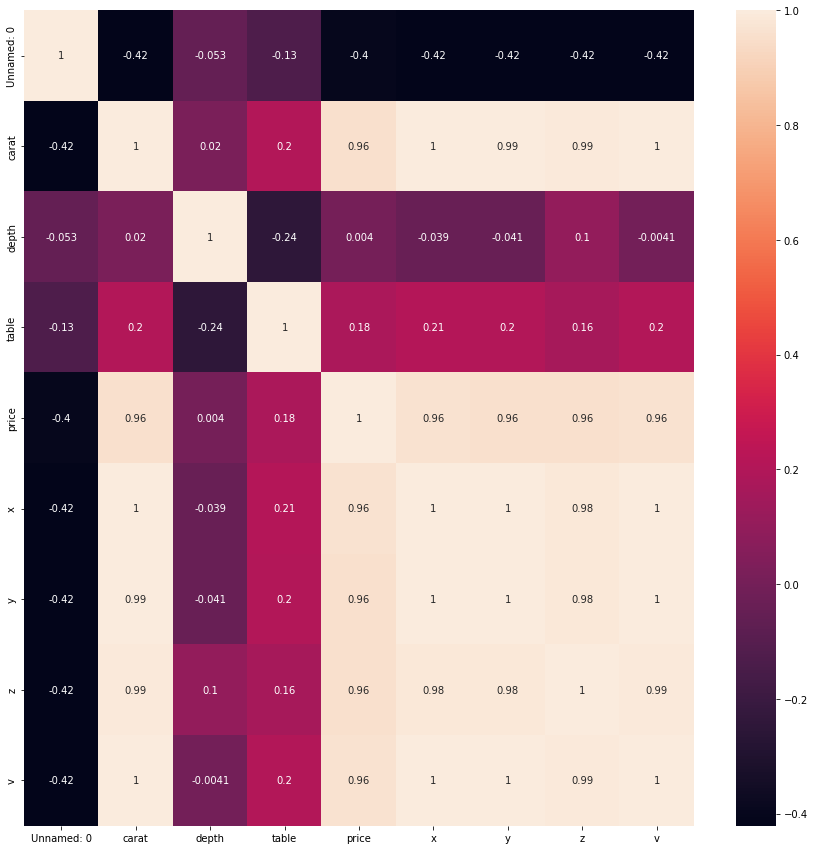

In [101]:
spearman_corr=diamonds.corr(method="spearman")
plt.figure(figsize=(15,15))
sns.heatmap(spearman_corr,annot=True)

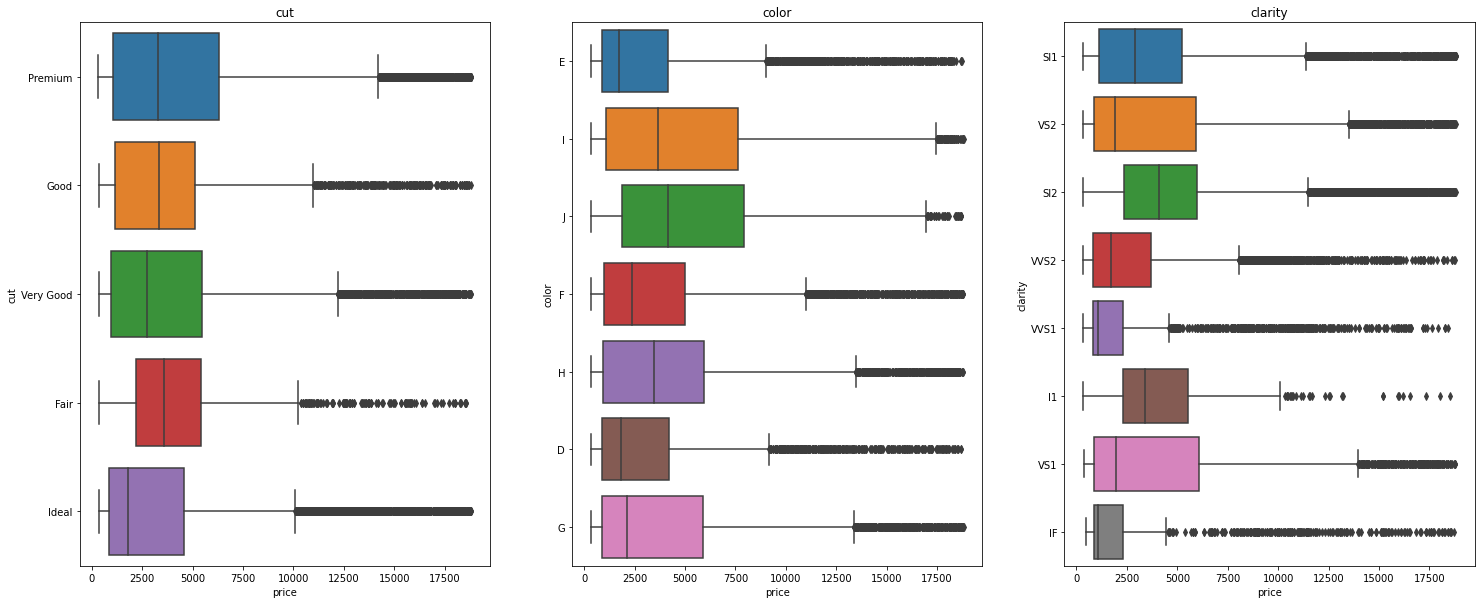

In [102]:
fig, ax=plt.subplots(1,3,figsize=(25,10))
sns.boxplot(data=diamonds,x="price",y="cut",ax=ax[0])
ax[0].set_title("cut")
sns.boxplot(data=diamonds,x="price",y="color",ax=ax[1])
ax[1].set_title("color")
sns.boxplot(data=diamonds,x="price",y="clarity",ax=ax[2])
ax[2].set_title("clarity")
plt.show()

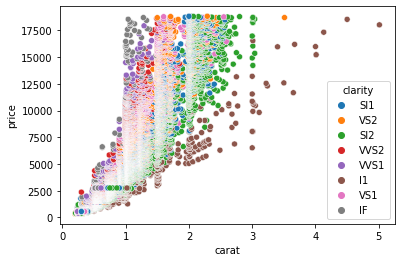

In [103]:
sns.scatterplot(data = diamonds,x="carat", y="price", hue="clarity")

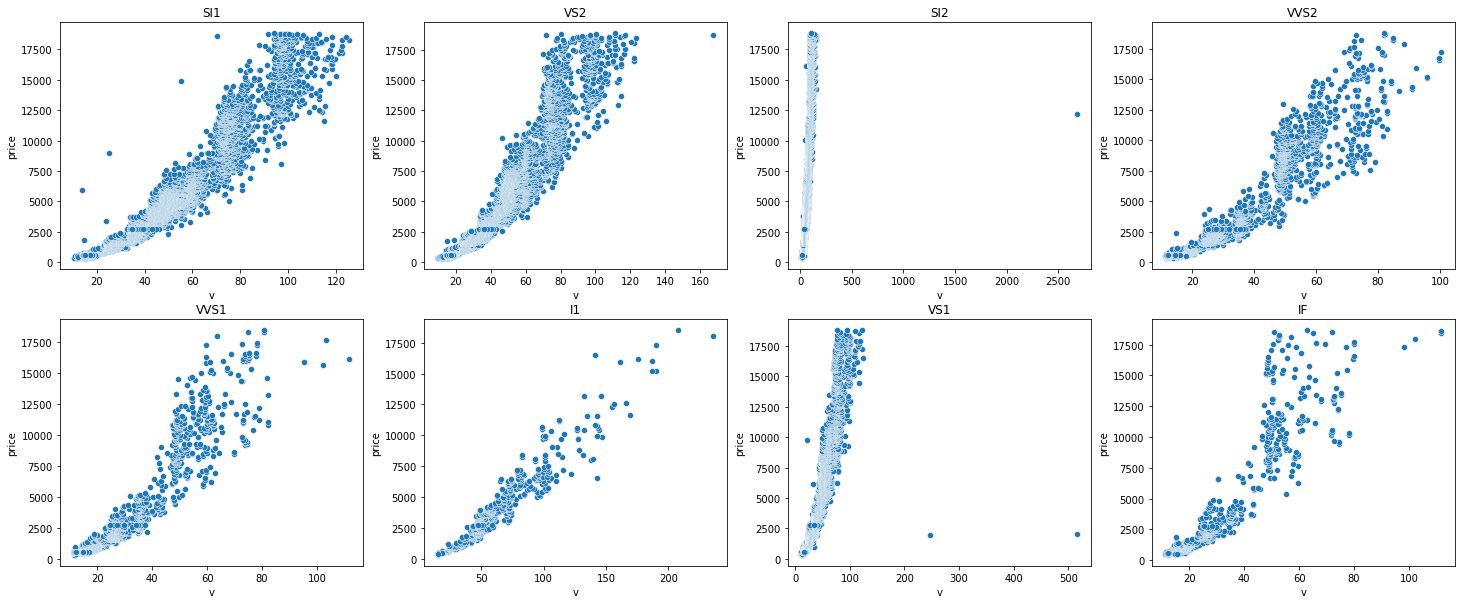

In [104]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["clarity"].unique():
  df = diamonds[diamonds["clarity"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="v", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = 1
    i = 0

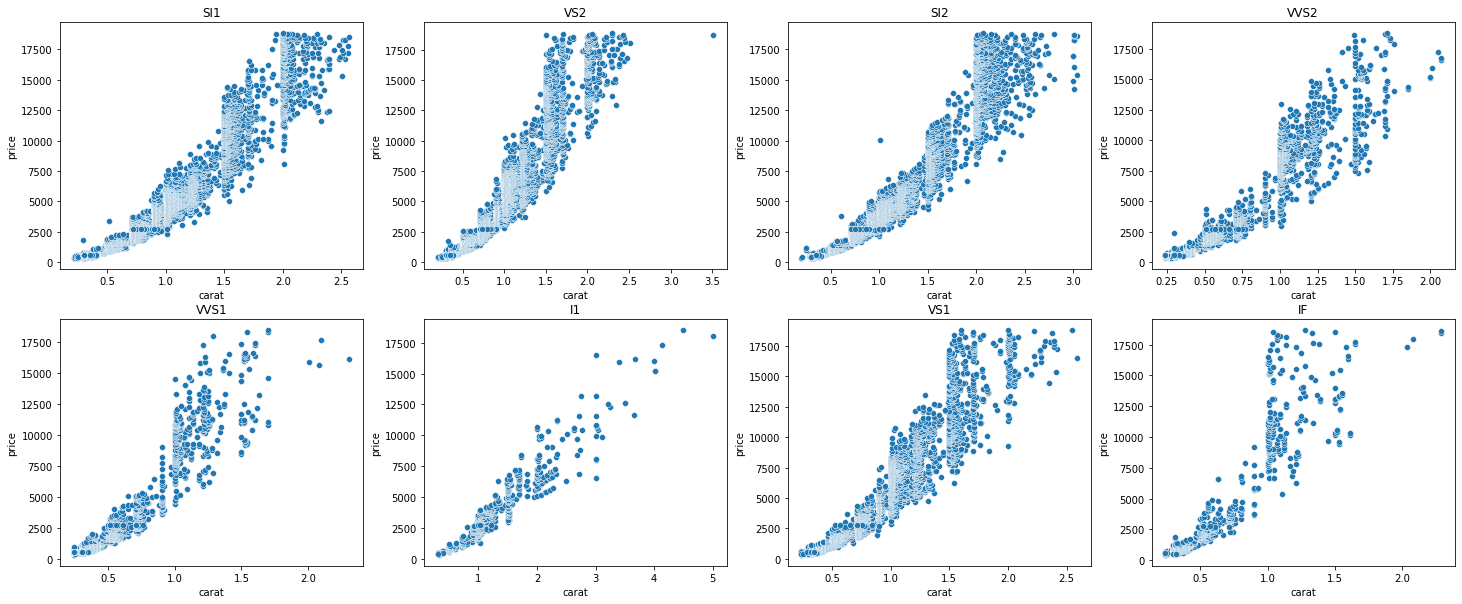

In [105]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["clarity"].unique():
  df = diamonds[diamonds["clarity"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="carat", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = 1
    i = 0

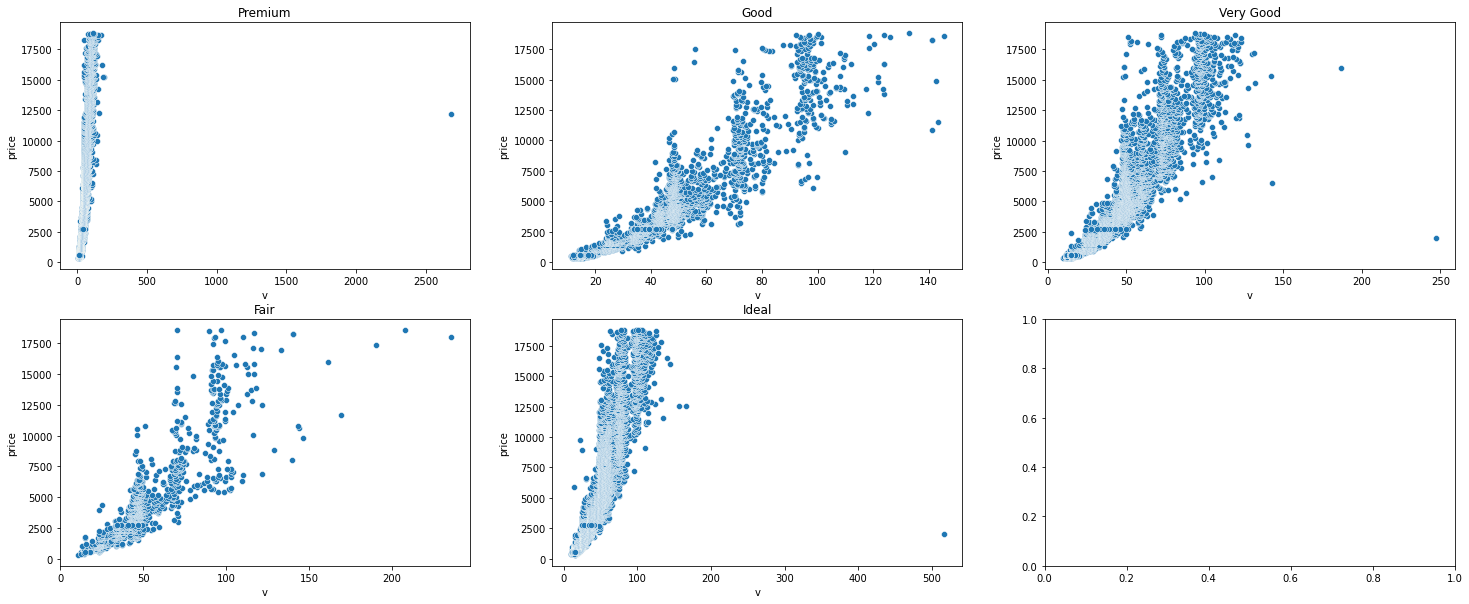

In [106]:
fig , ax =plt.subplots(2,3,figsize=(25,10))
i=j=0
for var in diamonds["cut"].unique():
  df = diamonds[diamonds["cut"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="v", y="price",ax= ax[j][i])
  i=i+1
  if i == 3:
    j = j+1
    i = 0

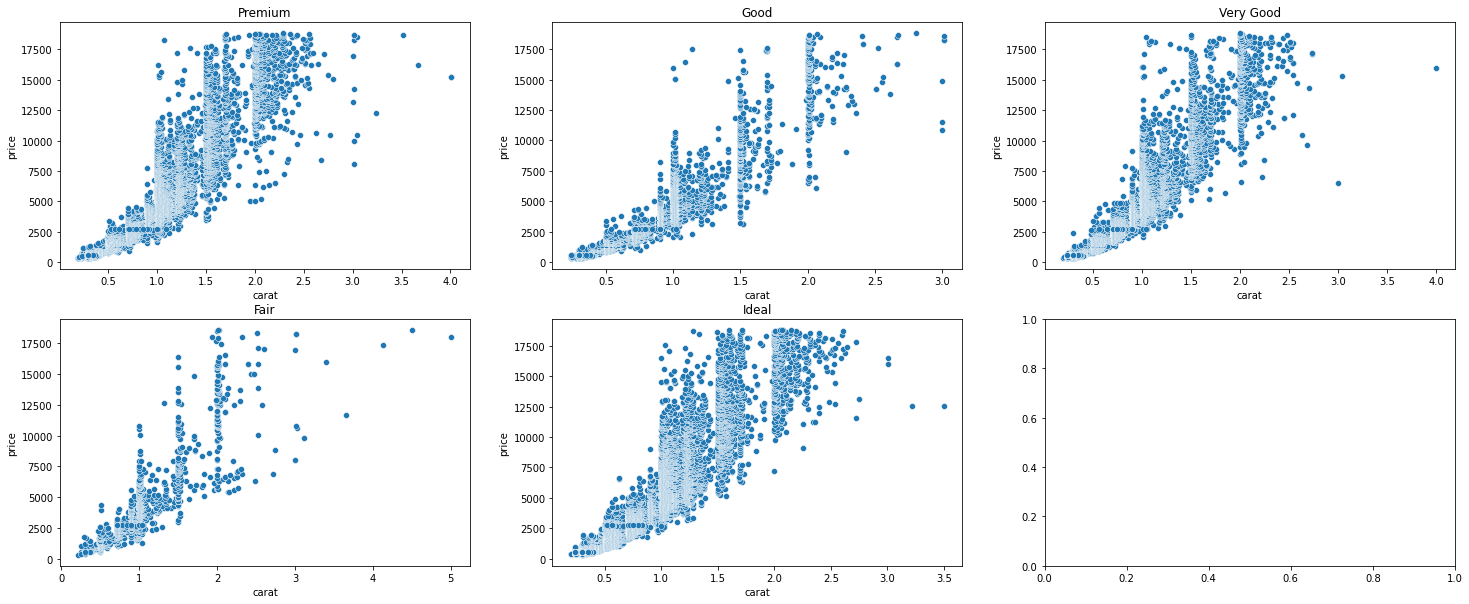

In [107]:
fig , ax =plt.subplots(2,3,figsize=(25,10))
i=j=0
for var in diamonds["cut"].unique():
  df = diamonds[diamonds["cut"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="carat", y="price",ax= ax[j][i])
  i=i+1
  if i == 3:
    j = j+1
    i = 0

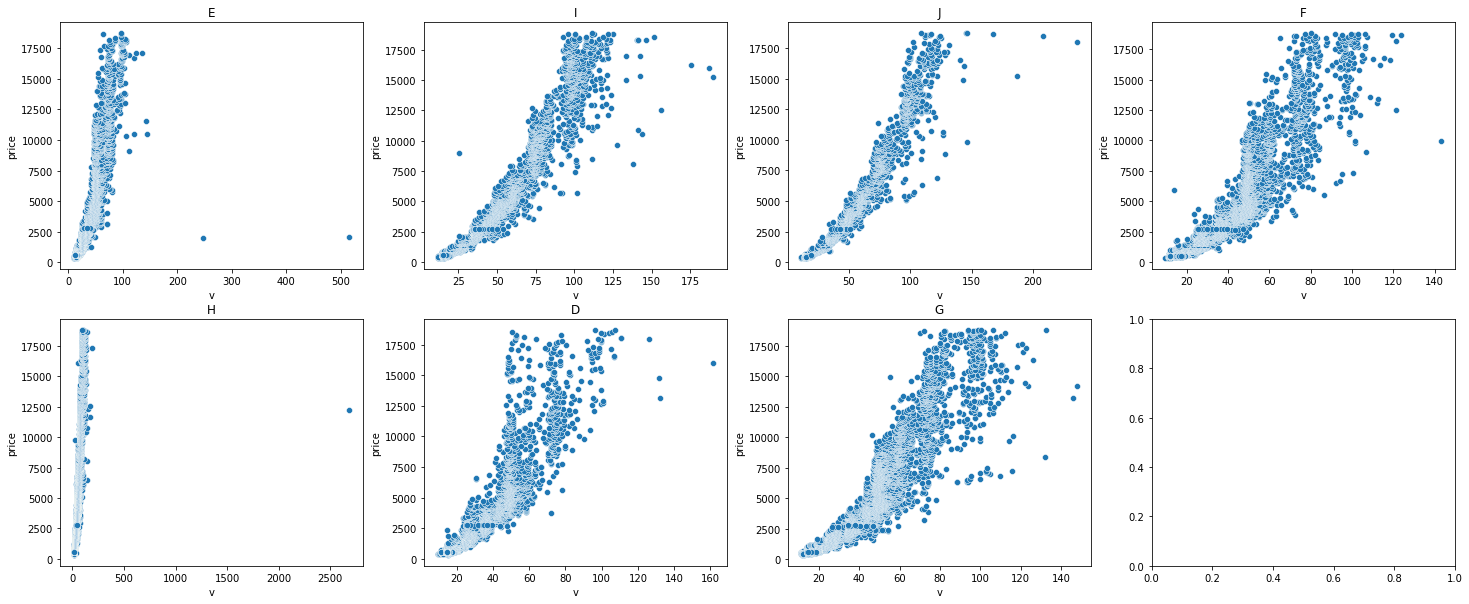

In [108]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["color"].unique():
  df = diamonds[diamonds["color"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="v", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = j+1
    i = 0

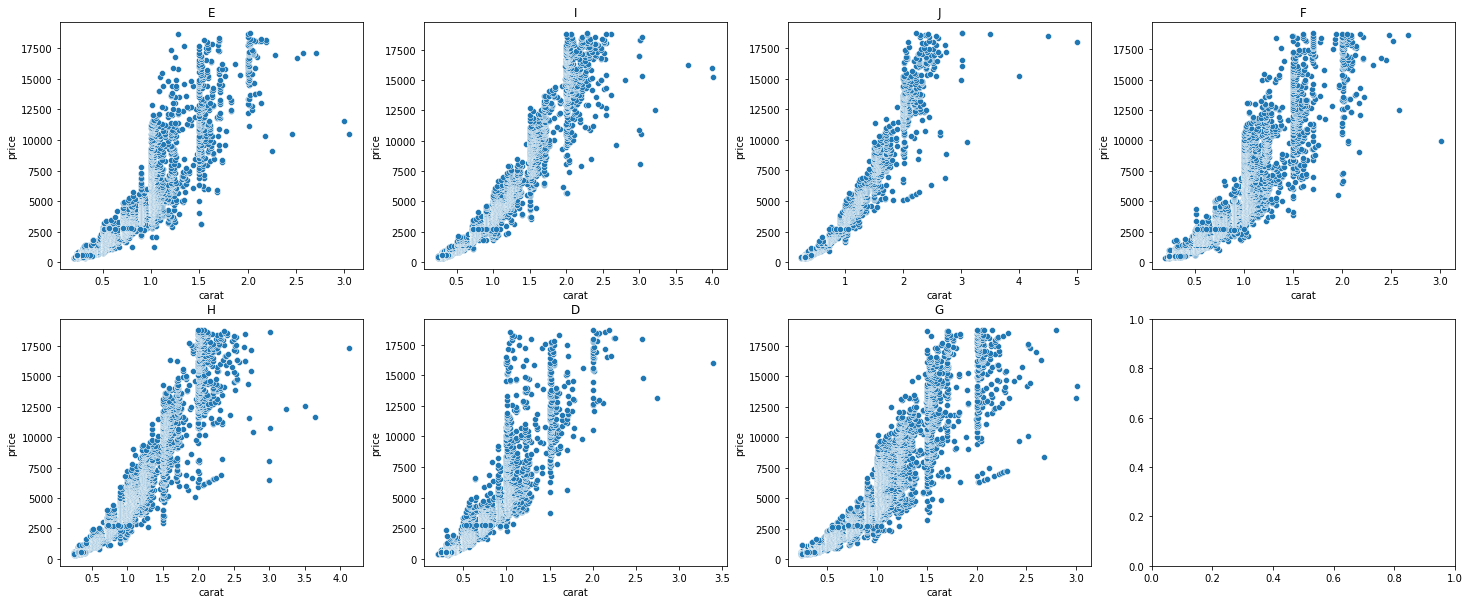

In [109]:
fig , ax =plt.subplots(2,4,figsize=(25,10))
i=j=0
for var in diamonds["color"].unique():
  df = diamonds[diamonds["color"]==var]
  ax[j][i].set_title(var)
  sns.scatterplot(data = df,x="carat", y="price",ax= ax[j][i])
  i=i+1
  if i == 4:
    j = j+1
    i = 0

In [110]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43034 non-null  float64
 9   y           43034 non-null  float64
 10  z           43034 non-null  float64
 11  v           43034 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 3.9+ MB


In [111]:
diamonds.dropna(axis=0,inplace=True)

In [112]:
diamonds["v2"] = diamonds["v"]**2
diamonds["carat2"] = diamonds["carat"]**2

In [113]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,v,v2,carat2
count,43034.000000,43034.000000,43034.000000,43034.000000,43034.000000,43034.000000,43034.000000,43034.000000,43034.000000,4.303400e+04,43034.000000
mean,26758.376307,0.796903,61.745999,57.439348,3942.172863,5.725328,5.728921,3.536027,38.664430,2.200297e+03,0.866814
std,15484.948030,0.481419,1.435081,2.239634,4022.974743,1.130227,1.157747,0.711393,26.558896,3.486257e+04,1.091121
min,2.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,9.496926,9.019160e+01,0.040000
25%,13326.250000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000,18.623124,3.468207e+02,0.144400
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000,34.514772,1.191269e+03,0.504100
75%,40289.500000,1.030000,62.500000,59.000000,5307.500000,6.500000,6.500000,4.020000,49.978967,2.497897e+03,1.060900
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,2685.138411,7.209968e+06,25.100100


In [114]:
def outliers(df,column,a=25,b=75):
  x=df[column]
  q1, q3 = x.quantile(a/100),x.quantile(b/100)
  iqr = q3 - q1
  lower_bound = np.max([q1 - (1.5 * iqr),0])
  upper_bound = q3 + (1.5 * iqr)
  print("<<<<<<<<",col,">>>>>>>>")
  print(lower_bound)
  print(upper_bound)
  mask = x.between( lower_bound, upper_bound, inclusive="both")
  mask = mask[mask==False]
  return mask

In [115]:
df = diamonds.copy()
df.drop("Unnamed: 0",axis= 1 , inplace= True)
num_columns = df.select_dtypes([int,float])
print(num_columns)

       carat  depth  table  price     x     y     z          v           v2  \
0       0.21   59.8   61.0    326  3.89  3.84  2.31  10.364832   107.429746   
1       0.29   62.4   58.0    334  4.20  4.23  2.63  13.914117   193.602666   
2       0.31   63.3   58.0    335  4.34  4.35  2.75  15.460268   239.019884   
3       0.24   62.8   57.0    336  3.94  3.96  2.48  11.489934   132.018589   
4       0.24   62.3   57.0    336  3.95  3.98  2.47  11.530682   132.956635   
...      ...    ...    ...    ...   ...   ...   ...        ...          ...   
43035   0.72   62.7   59.0   2757  5.69  5.73  3.58  34.857884  1215.072087   
43036   0.72   60.8   57.0   2757  5.75  5.76  3.50  34.421546  1184.842825   
43037   0.72   63.1   55.0   2757  5.69  5.75  3.61  34.876176  1216.347629   
43038   0.86   61.0   58.0   2757  6.15  6.12  3.74  41.918477  1757.158721   
43039   0.75   62.2   55.0   2757  5.83  5.87  3.64  36.782624  1352.961460   

       carat2  
0      0.0441  
1      0.0841  
2  

In [116]:
for col in (num_columns.columns):
  out = outliers(df,col,a=10,b=90)
  df = df.drop(out.index,axis=0)
  print("min = ",df [col].min())
  print("max = ",df [col].max())

<<<<<<<< carat >>>>>>>>
0.0
3.285
min =  0.2
max =  3.24
<<<<<<<< depth >>>>>>>>
55.050000000000004
68.25
min =  55.1
max =  68.2
<<<<<<<< table >>>>>>>>
47.5
67.5
min =  49.0
max =  67.0
<<<<<<<< price >>>>>>>>
0.0
23716.25
min =  326
max =  18823
<<<<<<<< x >>>>>>>>
0.0
11.8
min =  3.73
max =  9.54
<<<<<<<< y >>>>>>>>
0.0
11.76
min =  3.68
max =  9.46
<<<<<<<< z >>>>>>>>
0.0
7.290000000000001
min =  1.07
max =  6.16
<<<<<<<< v >>>>>>>>
0.0
158.90161326350386
min =  9.496926035638598
max =  156.26955308179603
<<<<<<<< v2 >>>>>>>>
0.0
12840.90930463403
min =  90.19160412639026
max =  12838.698457761779
<<<<<<<< carat2 >>>>>>>>
0.0
5.48085
min =  0.04000000000000001
max =  5.475599999999999


In [117]:
df.describe()

,carat,depth,table,price,x,y,z,v,v2,carat2
count,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000
mean,0.786080,61.739688,57.420917,3877.410823,5.706615,5.709017,3.523369,38.072624,1944.716396,0.831552
std,0.462207,1.368762,2.193765,3936.186032,1.109496,1.102127,0.684427,22.253164,2279.035231,0.977568
min,0.200000,55.100000,49.000000,326.000000,3.730000,3.680000,1.070000,9.496926,90.191604,0.040000
25%,0.380000,61.000000,56.000000,933.000000,4.660000,4.670000,2.870000,18.555172,344.294405,0.144400
50%,0.710000,61.800000,57.000000,2364.500000,5.700000,5.710000,3.520000,34.405632,1183.747490,0.504100
75%,1.020000,62.500000,59.000000,5249.000000,6.490000,6.490000,4.020000,49.828747,2482.904028,1.040400
max,2.340000,68.200000,67.000000,18823.000000,8.800000,8.690000,6.160000,113.275595,12831.360362,5.475600


In [118]:
diamonds=df

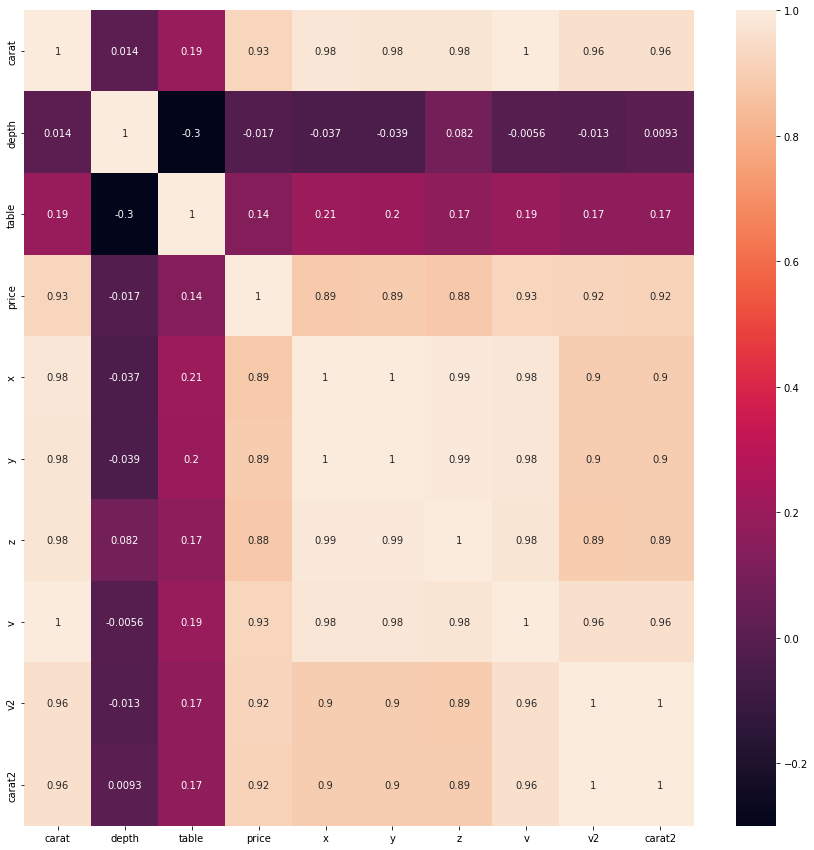

In [119]:
spearman_corr=diamonds.corr(method="pearson" )#method="spearman"
plt.figure(figsize=(15,15))
sns.heatmap(spearman_corr,annot=True)

In [120]:
cat_columns = ["cut", "color", "clarity"]
target_data = diamonds["price"].copy()
num_data = diamonds.drop(cat_columns+["price"],axis=1)
cat_data = diamonds[cat_columns].copy()
num_columns= list(num_data.columns)
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'v', 'v2', 'carat2'],
      dtype='object')

# contin

In [121]:
# id_ix, carat_ix, total_depth_percentage_ix, table_ix, length_ix, width_ix, depth_ix = 0,1,5,6,8,9,10

class columnDropperTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [122]:
col_to_exclude = ["x","y","z","price"]# ,"x","y","z","carat",	"cut",	"color",	"clarity",	"depth"	,"table","price"
#col_to_exclude = ["Id","x","y","z","price"]

In [123]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

#test 1:

cut , clerity : onehot

color : ordinal

In [124]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42668 entries, 0 to 43039
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    42668 non-null  float64
 1   cut      42668 non-null  object 
 2   color    42668 non-null  object 
 3   clarity  42668 non-null  object 
 4   depth    42668 non-null  float64
 5   table    42668 non-null  float64
 6   price    42668 non-null  int64  
 7   x        42668 non-null  float64
 8   y        42668 non-null  float64
 9   z        42668 non-null  float64
 10  v        42668 non-null  float64
 11  v2       42668 non-null  float64
 12  carat2   42668 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 4.6+ MB


In [125]:
lable_encoder= LabelEncoder()
diamonds["cut"] = lable_encoder.fit_transform(cat_data["cut"])
diamonds["clarity"] = lable_encoder.fit_transform(cat_data["clarity"])
diamonds["color"] = lable_encoder.fit_transform(cat_data["color"])

# linear Models with p-values and null hypothesies

In [126]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,v,v2,carat2
count,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000,42668.000000
mean,0.786080,2.551702,2.575209,3.841450,61.739688,57.420917,3877.410823,5.706615,5.709017,3.523369,38.072624,1944.716396,0.831552
std,0.462207,1.012762,1.698124,1.714871,1.368762,2.193765,3936.186032,1.109496,1.102127,0.684427,22.253164,2279.035231,0.977568
min,0.200000,0.000000,0.000000,0.000000,55.100000,49.000000,326.000000,3.730000,3.680000,1.070000,9.496926,90.191604,0.040000
25%,0.380000,2.000000,1.000000,2.000000,61.000000,56.000000,933.000000,4.660000,4.670000,2.870000,18.555172,344.294405,0.144400
50%,0.710000,2.000000,3.000000,4.000000,61.800000,57.000000,2364.500000,5.700000,5.710000,3.520000,34.405632,1183.747490,0.504100
75%,1.020000,3.000000,4.000000,5.000000,62.500000,59.000000,5249.000000,6.490000,6.490000,4.020000,49.828747,2482.904028,1.040400
max,2.340000,4.000000,6.000000,7.000000,68.200000,67.000000,18823.000000,8.800000,8.690000,6.160000,113.275595,12831.360362,5.475600


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


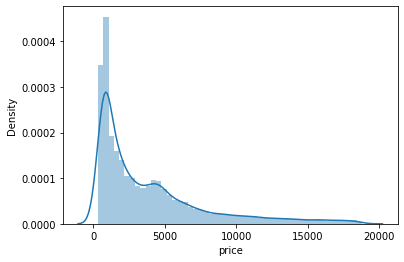

In [127]:
sns.distplot(diamonds['price'])

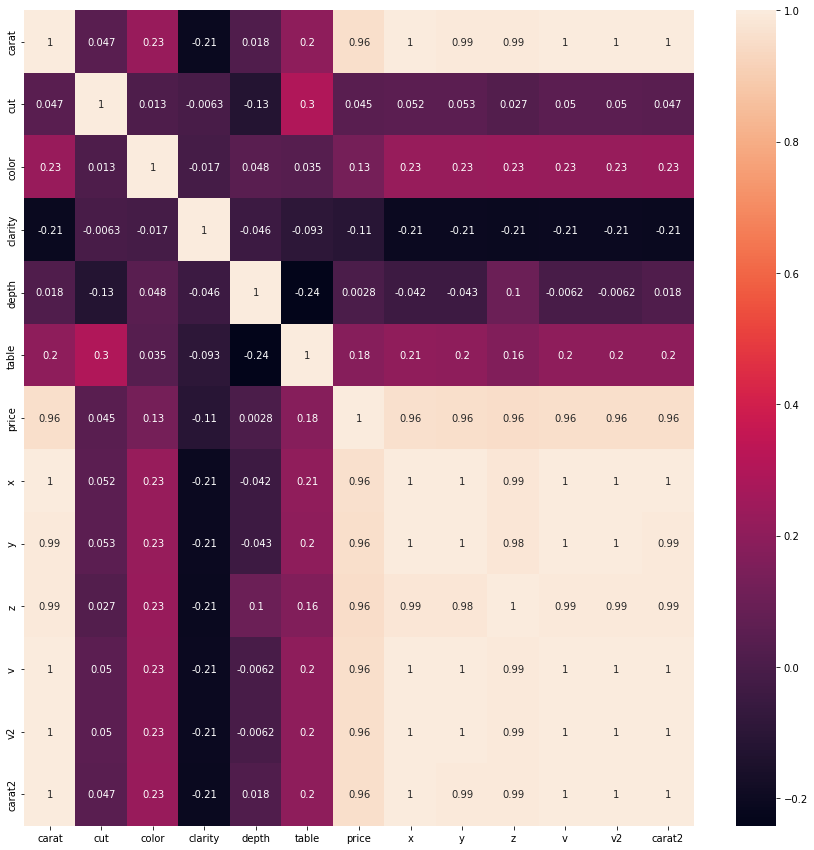

In [128]:
spearman_corr=diamonds.corr(method="spearman" )#method="spearman"
plt.figure(figsize=(15,15))
sns.heatmap(spearman_corr,annot=True)

In [129]:
X_ = diamonds.copy()

In [130]:
X_.drop(col_to_exclude,axis=1, inplace= True)

In [131]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42668 entries, 0 to 43039
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    42668 non-null  float64
 1   cut      42668 non-null  int64  
 2   color    42668 non-null  int64  
 3   clarity  42668 non-null  int64  
 4   depth    42668 non-null  float64
 5   table    42668 non-null  float64
 6   v        42668 non-null  float64
 7   v2       42668 non-null  float64
 8   carat2   42668 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.3 MB


In [132]:
import statsmodels.api as sma

In [133]:
LinearRegressionmo = LinearRegression()

X = X_
y = diamonds["price"]
X2  = sma.add_constant(X)
_0  = sma.OLS(y, X2).fit()
print(_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 4.012e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:00:49   Log-Likelihood:            -3.6580e+05
No. Observations:               42668   AIC:                         7.316e+05
Df Residuals:                   42658   BIC:                         7.317e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5497.0948    429.341     12.804      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We note that the p-values equal to zero for all features, which mean that they are dependent from the target vector.

In [134]:
numerical_Pipeline = Pipeline([
    ("columnDropper",columnDropperTransformer(col_to_exclude)),
    ("imputer",SimpleImputer(strategy="median")),
    ("standrization",StandardScaler())
    ])
diamonds_prepared = numerical_Pipeline.fit_transform(diamonds)
#AdaBR.fit(diamonds_prepared,target_data)
diamonds_prepared

array([[-1.24638267,  0.44265476, -0.92762772, ..., -1.24513158,
        -0.80617805, -0.80553045],
       [-1.073298  ,  0.44265476,  1.42794025, ..., -1.08563394,
        -0.76836647, -0.76461212],
       [-1.03002683, -1.5321668 ,  2.01683224, ..., -1.0161531 ,
        -0.74843797, -0.75233662],
       ...,
       [-0.14296787, -1.5321668 , -1.51651972, ..., -0.14364187,
        -0.31959897, -0.32034137],
       [ 0.15993031,  0.44265476,  0.83904825, ...,  0.17282477,
        -0.08229793, -0.09406301],
       [-0.07806112, -0.54475602, -1.51651972, ..., -0.05796995,
        -0.25965455, -0.27522891]])

In [135]:
diamonds_prepared.shape

(42668, 9)

# Testing

In [136]:
diamonds_test_path = "./drive/MyDrive/diamonds/diamonds.csv"
diamonds_test = pd.DataFrame(pd.read_csv(diamonds_test_path))
diamonds_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [137]:
new_test =test.copy()
ar=[]
for i in range(test.index.max()+1):
  ar.append(float(diamonds_test[diamonds_test["Unnamed: 0"]==test["Unnamed: 0"][i]].price))
  #ar.append(float(diamonds_test[diamonds_test["Unnamed: 0"]==test["Id"][i]].price))

In [138]:
new_test["price"]=ar
new_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326.0
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327.0
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,337.0
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,338.0
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46,340.0
...,...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,Very Good,E,VS2,62.8,60.0,5.59,5.65,3.53,2755.0
10896,53923,0.70,Very Good,D,VS1,63.1,59.0,5.67,5.58,3.55,2755.0
10897,53933,0.70,Very Good,E,VS2,60.5,59.0,5.71,5.76,3.47,2757.0
10898,53934,0.70,Very Good,E,VS2,61.2,59.0,5.69,5.72,3.49,2757.0


In [139]:
new_test = new_test.applymap(lambda x: np.NaN if x==0 else x)
new_test["x"] = np.where((new_test["x"].isna()) & (~new_test["y"].isna()),new_test["y"],new_test["x"])
new_test["y"] = np.where((~new_test["x"].isna()) & (new_test["y"].isna()),new_test["x"],new_test["y"])
new_test["z"] = np.where((~new_test["x"].isna()) & (~new_test["y"].isna())& (new_test["z"].isna()),new_test["depth"]*(new_test["x"]+new_test["y"])/200,new_test["z"])

In [140]:
new_test["v"] = 1/12*np.pi*new_test["z"]*(new_test["x"]+new_test["y"])**2/4*0.85+1/12*np.pi*new_test["z"]*0.15*((new_test["x"]+new_test["y"])**2/4+((new_test["x"]+new_test["y"])*new_test["table"]/200)**2+(new_test["x"]+new_test["y"])**2*new_test["table"]/400)


In [141]:
X_test = new_test.drop(["price"],axis=1)
y_test = new_test["price"].copy()
num_columns1= X_test.columns
num_columns1

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'v'],
      dtype='object')

In [142]:
X_test["v2"] = X_test["v"]**2
X_test["carat2"] = X_test["carat"]**2

In [143]:
lable_encoder= LabelEncoder()
X_test["cut"] = lable_encoder.fit_transform(X_test["cut"])
X_test["clarity"] = lable_encoder.fit_transform(X_test["clarity"])
X_test["color"] = lable_encoder.fit_transform(X_test["color"])

In [144]:
X_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,v,v2,carat2
0,1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,11.280342,127.246108,0.0529
1,3,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,11.572259,133.917170,0.0529
2,8,0.26,4,4,2,61.9,55.0,4.07,4.11,2.53,12.496740,156.168511,0.0676
3,10,0.23,4,4,4,59.4,61.0,4.00,4.05,2.39,11.630034,135.257681,0.0529
4,12,0.23,2,6,4,62.8,56.0,3.93,3.90,2.46,11.164653,124.649477,0.0529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,4,1,5,62.8,60.0,5.59,5.65,3.53,33.391966,1115.023384,0.4900
10896,53923,0.70,4,0,4,63.1,59.0,5.67,5.58,3.55,33.544335,1125.222406,0.4900
10897,53933,0.70,4,1,5,60.5,59.0,5.71,5.76,3.47,34.083336,1161.673806,0.4900
10898,53934,0.70,4,1,5,61.2,59.0,5.69,5.72,3.49,33.922082,1150.707668,0.4900


In [145]:
col_to_exclude_t = ["Unnamed: 0","x","y","z"]
numerical_Pipeline = Pipeline([
    ("columnDropper",columnDropperTransformer(col_to_exclude_t)),
    ("imputer",SimpleImputer(strategy="median")),
    ("standrization",StandardScaler())
    ])
X_test = numerical_Pipeline.fit_transform(X_test)
X_test

array([[-1.28962548, -0.56149882, -0.95779209, ..., -1.29053732,
        -0.87018605, -0.86816378],
       [-1.28962548, -1.51333974, -0.95779209, ..., -1.2768503 ,
        -0.86701988, -0.86816378],
       [-1.22196347,  1.34218303,  0.81559568, ..., -1.23350443,
        -0.85645908, -0.8519387 ],
       ...,
       [-0.22958734,  1.34218303, -0.95779209, ..., -0.22138037,
        -0.37923242, -0.38571596],
       [-0.22958734,  1.34218303, -0.95779209, ..., -0.22894103,
        -0.3844371 , -0.38571596],
       [-0.22958734,  1.34218303, -1.54892135, ..., -0.21227065,
        -0.3729286 , -0.38571596]])

In [146]:
X_test.shape

(10900, 9)

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor 

In [150]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rn = RandomForestRegressor()
extr= ExtraTreesRegressor()
XGB = XGBRegressor( objective= 'reg:squarederror')
GBr = GradientBoostingRegressor()
XGBRegressormo = XGBRegressor(colsample_bytree= 0.3,learning_rate= 0.3,
                              max_depth= 10,
                              min_child_weight= 10,
                              min_split_loss= 10,
                              n_estimators= 300,
                              objective= 'reg:squarederror',
                              subsample= 0.6)
AdaBR1 = AdaBoostRegressor(base_estimator = XGB,learning_rate=0.01,loss='square')
AdaBR2 = AdaBoostRegressor(base_estimator = dt,learning_rate=0.01,loss='square')

li = [rn,extr,AdaBR1]#,AdaBR2
#li = [AdaBR1,AdaBR2]
di = {}
di2 = {}
l = 1
for i in li:
    i.fit(diamonds_prepared,target_data)
    ypred = i.predict(X_test)
    if l == 1:
      sumpred = ypred
    else:
      sumpred = sumpred + ypred
    sum_pred = sumpred/l
    print(l)
    err = np.sqrt(metrics.mean_squared_error(y_test, sum_pred))
    di2.update({str(i):err})
    print(i,":",r2_score(sum_pred,y_test)*100)
    di.update({str(i):i.score(X_test,y_test)*100})
    l = l + 1


1
RandomForestRegressor() : 97.80536549144061
2
ExtraTreesRegressor() : 97.85756907683985
3
AdaBoostRegressor(base_estimator=XGBRegressor(objective='reg:squarederror'),
                  learning_rate=0.01, loss='square') : 97.87991849708138


In [152]:
di2

{'RandomForestRegressor()': 583.5844641687141,
 'ExtraTreesRegressor()': 578.0127649629549,
 "AdaBoostRegressor(base_estimator=XGBRegressor(objective='reg:squarederror'),\n                  learning_rate=0.01, loss='square')": 567.1906794947945}

In [131]:
di2

{'LinearRegression()': 1325.3399998492503,
 'DecisionTreeRegressor()': 822.1675061105101,
 'RandomForestRegressor()': 581.8226922723214,
 'KNeighborsRegressor()': 805.234538011963,
 "XGBRegressor(objective='reg:squarederror')": 653.2655103163332,
 'GradientBoostingRegressor()': 674.7369902062791,
 "AdaBoostRegressor(base_estimator=XGBRegressor(objective='reg:squarederror'),\n                  learning_rate=0.01, loss='square')": 652.6005304891789,
 "AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,\n                  loss='square')": 639.3100428405993}

In [153]:
dt_parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
rf_parameters ={'bootstrap': [True, False],
                'max_depth': [5,10, 20, 30],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 3, 7,10],
                'min_samples_split': [ 5, 10,20],
                'n_estimators': [50,200, 400]}
extr_parameters = {
    'n_estimators': [100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'criterion': ['mse', 'mae'],
    'max_depth': [2,8,16,32,50],
    'min_sample_split': [2,4,6],
    'min_sample_leaf': [1,2],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
}
xgb_parameters ={
    "learning_rate":[0,0.3,0.6,1],
    'objective':['reg:squarederror'],
    "min_split_loss":[0,10],
    'max_depth': [0,3,10],
    'min_child_weight': [0,10],
    'subsample': [0,0.3,0.6,1],
    'colsample_bytree': [0,0.3,0.6,1],
    'n_estimators': [300], #number of trees, change it to 1000 for better results
}
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
extr= ExtraTreesRegressor()
XGB = XGBRegressor( objective= 'reg:squarederror')
param_grid = {"rf":rf_parameters}#,"extr":extr_parameters,"xbg":xgb_parameters}#"dt":dt_parameters,
models_grid = {"rf":rf}#,"extr":extr,"xbg":XGB}#"dt":dt,


In [ ]:
dt={'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}

In [ ]:
for key,value in param_grid.items():
  reg = models_grid[key]
  grid_search = GridSearchCV(reg,value, cv=4,scoring='neg_mean_squared_error', return_train_score=True)
  grid_search.fit(diamonds_prepared, target_data)
  print(grid_search.best_params_)
  rmse_scores = np.sqrt(-grid_search.best_score_)
  display_scores(rmse_scores)



In [58]:
scores = cross_val_score(AdaBR,diamonds_prepared,target_data,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [1272.20056825 3580.35327157 1409.43434481 1148.77652445]
Mean: 1852.6911772690128
Standard deviation: 1001.7182883956727


In [232]:

Lassomo = Lasso()
Ridgemo = Ridge()
DecisionTreeRegressormo = DecisionTreeRegressor()
RandomForestRegressormo = RandomForestRegressor()
XGBRegressormo = XGBRegressor()

In [233]:
"""
strategies = ['mean' , 'median']
encoders_1 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()
encoders_2 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()
encoders_3 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()
scalers = {"MinMaxScaler":MinMaxScaler(),"StandardScaler":StandardScaler(),"MaxAbsScaler":MaxAbsScaler(),"RobustScaler":RobustScaler(),"QuantileTransformer (uniform)":QuantileTransformer(output_distribution='uniform'),"QuantileTransformer (normal)":QuantileTransformer(output_distribution='normal'),"PowerTransformer (yeo-johnson)":PowerTransformer(method="yeo-johnson"),"PowerTransformer (box-cox)":PowerTransformer(method="box-cox")}
models = {"LinearRegression":LinearRegressionmo,"Lasso":Lassomo,"Ridge":Ridgemo,"DecisionTreeRegressor":DecisionTreeRegressormo,"RandomForestRegressor":RandomForestRegressormo,"XGBRegressor":XGBRegressormo}
result_dec = {"strategy":[],"model":[],"scaler":[],"encoder_1":[],"encoder_2":[],"encoder_3":[],"RMSE":[],"STD":[]}
i=0
for stra in strategies:
  for e1_key, e1_mod in zip(encoders_1.keys(),encoders_1.values()):
    for e2_key, e2_mod in zip(encoders_2.keys(),encoders_2.values()):
      for e3_key, e3_mod in zip(encoders_3.keys(),encoders_3.values()):
        for s_key, s_mod in zip(scalers.keys(),scalers.values()):
          for m_key, m_mod in zip(models.keys(),models.values()):
            numerical_Pipeline = Pipeline([
                ("columnDropper",columnDropperTransformer(col_to_exclude)),
                ("imputer",SimpleImputer(strategy=stra)),
                ("std_scaler",s_mod)
                ])
            full_pipline = ColumnTransformer([
                ("cat1",e1_mod,["cut"]),
                ("cat2",e2_mod,['clarity']),
                ("cat3",e3_mod,["color"]),
                ("num",numerical_Pipeline,num_columns)
                ])
            diamonds_prepared = full_pipline.fit_transform(diamonds)
            m_mod.fit(diamonds_prepared,target_data)
            scores = cross_val_score(m_mod,diamonds_prepared,target_data,scoring="neg_mean_squared_error", cv=4)
            rmse_scores = np.sqrt(-scores)
            print("\n<<<<<<<<<<<<<<<<<<<<<<<<<<<",i,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
            print(np.shape(diamonds_prepared))
            print(stra,m_key,s_key,e1_key,e2_key,e3_key,"\n")
            display_scores(rmse_scores)
            result_dec["strategy"].append(stra)
            result_dec["model"].append(m_key)
            result_dec["scaler"].append(s_key)
            result_dec["encoder_1"].append(e1_key)
            result_dec["encoder_2"].append(e2_key)
            result_dec["encoder_3"].append(e3_key)
            result_dec["RMSE"].append(rmse_scores.mean())
            result_dec["STD"].append(rmse_scores.std())
            i=i+1
"""

'\nstrategies = [\'mean\' , \'median\']\nencoders_1 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()\nencoders_2 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()\nencoders_3 = {"OrdinalEncoder":OrdinalEncoder() ,"OneHotEncoder":OneHotEncoder() } #,"LabelEncoder":LabelEncoder()\nscalers = {"MinMaxScaler":MinMaxScaler(),"StandardScaler":StandardScaler(),"MaxAbsScaler":MaxAbsScaler(),"RobustScaler":RobustScaler(),"QuantileTransformer (uniform)":QuantileTransformer(output_distribution=\'uniform\'),"QuantileTransformer (normal)":QuantileTransformer(output_distribution=\'normal\'),"PowerTransformer (yeo-johnson)":PowerTransformer(method="yeo-johnson"),"PowerTransformer (box-cox)":PowerTransformer(method="box-cox")}\nmodels = {"LinearRegression":LinearRegressionmo,"Lasso":Lassomo,"Ridge":Ridgemo,"DecisionTreeRegressor":DecisionTreeRegressormo,"RandomForestRegressor":RandomForestRegres

In [234]:
"""
pd_res = pd.DataFrame.from_dict(result_dec)
display(pd_res)
pd_res.to_csv('./comparissions.csv',index=False)
"""

"\npd_res = pd.DataFrame.from_dict(result_dec)\ndisplay(pd_res)\npd_res.to_csv('./comparissions.csv',index=False)\n"

In [235]:
"""
pd_res.nsmallest(10,"RMSE")
"""

'\npd_res.nsmallest(10,"RMSE")\n'

In [236]:
"""
display(pd_res[pd_res["RMSE"]==pd_res["RMSE"].min()])
"""

'\ndisplay(pd_res[pd_res["RMSE"]==pd_res["RMSE"].min()])\n'

In [237]:
"""
XGBRegressormo = XGBRegressor(colsample_bytree= 0.3,learning_rate= 0.3,
                              max_depth= 10,
                              min_child_weight= 50,
                              min_split_loss= 35,
                              n_estimators= 1000,
                              objective= 'reg:squarederror',
                              subsample= 0.6)
"""
XGBRegressormo = XGBRegressor(colsample_bytree= 0.3,learning_rate= 0.3,
                              max_depth= 10,
                              min_child_weight= 10,
                              min_split_loss= 10,
                              n_estimators= 300,
                              objective= 'reg:squarederror',
                              subsample= 0.6)


"""
XGBRegressormo.fit(diamonds_prepared,target_data)
scores = cross_val_score(XGBRegressormo,diamonds_prepared,target_data,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
"""

'\nXGBRegressormo.fit(diamonds_prepared,target_data)\nscores = cross_val_score(XGBRegressormo,diamonds_prepared,target_data,scoring="neg_mean_squared_error", cv=4)\nrmse_scores = np.sqrt(-scores)\ndisplay_scores(rmse_scores)\n'

In [238]:
df_diamonds_prepared = pd.DataFrame(list(diamonds_prepared),columns=["carat", "cut", "color", "clarity", "depth", "table", "v"])
df_diamonds_prepared.describe()

,carat,cut,color,clarity,depth,table,v
count,4.303400e+04,4.303400e+04,4.303400e+04,4.303400e+04,4.303400e+04,4.303400e+04,4.303400e+04
mean,3.645672e-16,1.452985e-17,5.085448e-17,7.727239e-17,6.261045e-16,-2.385868e-15,-3.090896e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.242496e+00,-2.490410e+00,-1.519042e+00,-2.232591e+00,-1.306393e+01,-6.445729e+00,-1.257572e+00
25%,-8.676268e-01,-5.324064e-01,-9.319387e-01,-1.067339e+00,-5.198209e-01,-6.425441e-01,-8.628906e-01
50%,-1.803666e-01,-5.324064e-01,2.422686e-01,9.791210e-02,3.769489e-02,-1.961452e-01,-1.756729e-01
75%,4.860676e-01,4.465953e-01,8.293723e-01,6.805378e-01,5.255212e-01,6.966526e-01,4.929877e-01
max,6.692236e+00,1.425597e+00,2.003580e+00,1.845789e+00,1.202428e+01,1.676701e+01,9.030406e+00


In [239]:
# n_estimators : Number of trees in random forest
# max_features : Number of features to consider at every split
# max_depth : Maximum number of levels in tree
# max_depth= [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split : Minimum number of samples required to split a node
# min_samples_leaf : Minimum number of samples required at each leaf node
# bootstrap : Method of selecting samples for training each tree
"""
param_grid ={
    #"booster": ["gbtree","gblinear"],
    "learning_rate":[0,0.3,0.6,1],
     'objective':['reg:squarederror'],
     "min_split_loss":[0,10],
     'max_depth': [0,3,10],
     'min_child_weight': [0,10],
     'subsample': [0,0.3,0.6,1],
     'colsample_bytree': [0,0.3,0.6,1],
     'n_estimators': [300], #number of trees, change it to 1000 for better results
}
XGB_reg = XGBRegressor()
grid_search = GridSearchCV(XGB_reg,param_grid, cv=4,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(diamonds_prepared, target_data)
"""

'\nparam_grid ={\n    #"booster": ["gbtree","gblinear"],\n    "learning_rate":[0,0.3,0.6,1],\n     \'objective\':[\'reg:squarederror\'],\n     "min_split_loss":[0,10],\n     \'max_depth\': [0,3,10],\n     \'min_child_weight\': [0,10],\n     \'subsample\': [0,0.3,0.6,1],\n     \'colsample_bytree\': [0,0.3,0.6,1],\n     \'n_estimators\': [300], #number of trees, change it to 1000 for better results\n}\nXGB_reg = XGBRegressor()\ngrid_search = GridSearchCV(XGB_reg,param_grid, cv=4,scoring=\'neg_mean_squared_error\', return_train_score=True)\ngrid_search.fit(diamonds_prepared, target_data)\n'

In [240]:
"""
grid_search.best_params_
rmse_scores = np.sqrt(-grid_search.best_score_)
display_scores(rmse_scores)
"""

'\ngrid_search.best_params_\n'

In [241]:
"""
rmse_scores = np.sqrt(-grid_search.best_score_)
display_scores(rmse_scores)
"""

'\nrmse_scores = np.sqrt(-grid_search.best_score_)\ndisplay_scores(rmse_scores)\n'

In [242]:
"""
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score), params)
"""

'\ncvres = grid_search.cv_results_\nfor mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):\n  print(np.sqrt(-mean_score), params)\n'

In [243]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor,HistGradientBoostingRegressor

LinearRegressionmo = LinearRegression()
Lassomo = Lasso()
Ridgemo = Ridge()
DecisionTreeRegressormo = DecisionTreeRegressor()
RandomForestRegressormo = RandomForestRegressor()
XGBRegressormo = XGBRegressor(colsample_bytree= 0.3,learning_rate= 0.3,
                              max_depth= 10,
                              min_child_weight= 10,
                              min_split_loss= 10,
                              n_estimators= 300,
                              objective= 'reg:squarederror',
                              subsample= 0.6)
#estimators=[("lr",LinearRegressionmo),("las",Lassomo),("rf",RandomForestRegressormo),("XGB",XGBRegressormo)],n_jobs=4,verbose=True

In [244]:
#import joblib
#bg = joblib.load("AdaBoostRegressor.pkl")

In [245]:
#bg = joblib.load("XGBRegressor.pkl")

In [246]:
bg1 = AdaBoostRegressor(base_estimator=XGBRegressormo,learning_rate=0.01, random_state=42,loss='square') #42 #best one 24/9/2022
bg1.fit(diamonds_prepared,target_data)

AdaBoostRegressor(base_estimator=XGBRegressor(colsample_bytree=0.3,
                                              learning_rate=0.3, max_depth=10,
                                              min_child_weight=10,
                                              min_split_loss=10,
                                              n_estimators=300,
                                              objective='reg:squarederror',
                                              subsample=0.6),
                  learning_rate=0.01, loss='square', random_state=42)

In [247]:
bg2 = Lasso(alpha=0.1,max_iter=100000,random_state=42)
bg2.fit(diamonds_prepared,target_data)

Lasso(alpha=0.1, max_iter=100000, random_state=42)

In [248]:
bg3 = RandomForestRegressor(n_estimators=1000,random_state=42)
bg3.fit(diamonds_prepared,target_data)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [258]:
scores = cross_val_score(bg3,diamonds_prepared,target_data,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [1034.91828346 3229.60961103  885.20542687  603.01516058]
Mean: 1438.1871204841468
Standard deviation: 1045.8395252922307


In [249]:
feature_importances = bg1.feature_importances_
attributes = ["carat", "cut", "color", "clarity", "depth", "table", "v"]
sorted(zip(feature_importances, attributes), reverse=True)

[(0.45612413, 'v'),
 (0.2712916, 'carat'),
 (0.13402112, 'clarity'),
 (0.07519086, 'color'),
 (0.029791584, 'cut'),
 (0.018623728, 'table'),
 (0.014956949, 'depth')]

In [250]:
feature_importances = bg3.feature_importances_
attributes = ["carat", "cut", "color", "clarity", "depth", "table", "v"]
sorted(zip(feature_importances, attributes), reverse=True)

[(0.7587790762013819, 'v'),
 (0.1352073592015773, 'carat'),
 (0.06304266694040193, 'clarity'),
 (0.03245111398238518, 'color'),
 (0.0053340945813043755, 'depth'),
 (0.003232517035631705, 'table'),
 (0.001953172057317621, 'cut')]

In [252]:
AdaBoostR_training_predictions=bg1.predict(diamonds_prepared)

In [253]:
RF_training_predictions=bg3.predict(diamonds_prepared)

In [254]:
lr_training_predictions=bg2.predict(diamonds_prepared)

In [255]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43034 entries, 0 to 43039
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43034 non-null  int64  
 1   carat       43034 non-null  float64
 2   cut         43034 non-null  int64  
 3   color       43034 non-null  int64  
 4   clarity     43034 non-null  int64  
 5   depth       43034 non-null  float64
 6   table       43034 non-null  float64
 7   price       43034 non-null  int64  
 8   x           43028 non-null  float64
 9   y           43028 non-null  float64
 10  z           43028 non-null  float64
 11  v           43028 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 4.3 MB


In [256]:
diamonds["AdaBoostR"]=pd.DataFrame(list(AdaBoostR_training_predictions))
diamonds["RF"]=pd.DataFrame(list(RF_training_predictions))
diamonds["lr"]=pd.DataFrame(list(lr_training_predictions))

diamonds.info()
#diamonds[diamonds["AdaBoostR"].isna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43034 entries, 0 to 43039
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43034 non-null  int64  
 1   carat       43034 non-null  float64
 2   cut         43034 non-null  int64  
 3   color       43034 non-null  int64  
 4   clarity     43034 non-null  int64  
 5   depth       43034 non-null  float64
 6   table       43034 non-null  float64
 7   price       43034 non-null  int64  
 8   x           43028 non-null  float64
 9   y           43028 non-null  float64
 10  z           43028 non-null  float64
 11  v           43028 non-null  float64
 12  AdaBoostR   43028 non-null  float32
 13  RF          43028 non-null  float64
 14  lr          43028 non-null  float64
dtypes: float32(1), float64(9), int64(5)
memory usage: 5.1 MB


In [ ]:
from sklearn.impute import KNNImputer
targ_imputer= KNNImputer()
diamonds = diamonds.drop(["Unnamed: 0","x","y","z"],axis=1)
new_diamonds = targ_imputer.fit_transform(diamonds)
new_diamonds = pd.DataFrame(list(new_diamonds),columns=["carat", "cut", "color", "clarity", "depth", "table","price", "v","AdaBoostR"])


In [257]:
#diamonds["avg"]= (np.abs(diamonds["AdaBoostR"])+np.abs(diamonds["lr"]))/2
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,v,AdaBoostR,RF,lr
0,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,10.364832,604.864990,365.644750,-1189.422291
1,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,13.914117,402.707825,387.490071,-595.162816
2,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,15.460268,1184.564087,356.034150,-1468.446112
3,6,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48,11.489934,-33.808537,356.249500,-534.340997
4,7,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47,11.530682,433.886505,374.552733,-537.996911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,3,0,2,62.7,59.0,2757,5.69,5.73,3.58,34.857884,NaN,NaN,NaN
43036,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,34.421546,NaN,NaN,NaN
43037,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,34.876176,NaN,NaN,NaN
43038,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,41.918477,NaN,NaN,NaN


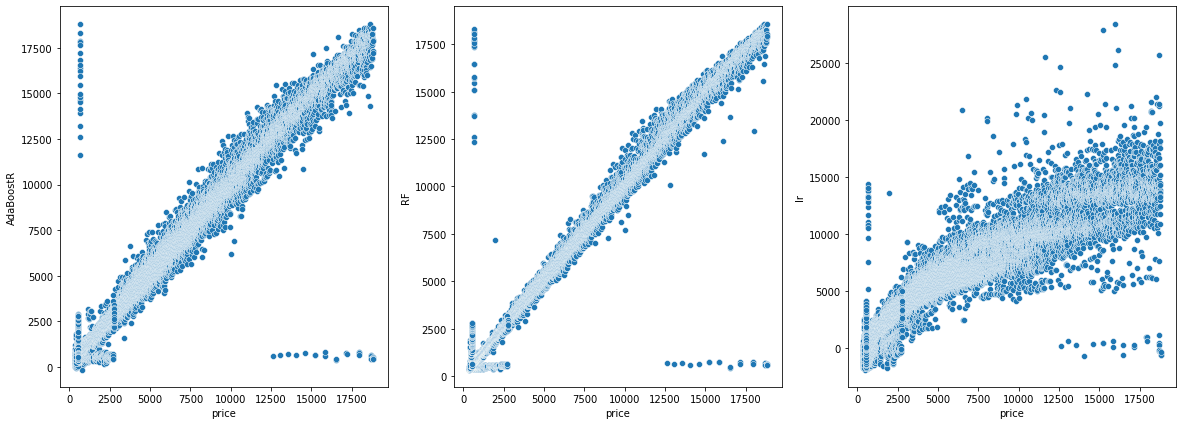

In [261]:
fig,ax = plt.subplots(1,3,figsize=(20,7))
sns.scatterplot(data=diamonds,x= "price",y="AdaBoostR",ax= ax[0])
sns.scatterplot(data=diamonds,x= "price",y="RF",ax= ax[1])
sns.scatterplot(data=diamonds,x= "price",y="lr",ax= ax[2])

In [268]:
est_data=diamonds[["AdaBoostR","RF","price"]]
est_data.dropna(inplace=True)
est_data

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,AdaBoostR,RF,price
0,604.864990,365.644750,326
1,402.707825,387.490071,334
2,1184.564087,356.034150,335
3,-33.808537,356.249500,336
4,433.886505,374.552733,336
...,...,...,...
43029,2646.262695,2754.728911,2756
43030,2939.786621,2832.075357,2756
43031,2710.847900,2751.820733,2756
43032,2536.431152,2749.513000,2756


In [269]:
new_target = est_data["price"].copy()
est_data.drop("price",axis=1,inplace=True)
est_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AdaBoostR,RF
0,604.864990,365.644750
1,402.707825,387.490071
2,1184.564087,356.034150
3,-33.808537,356.249500
4,433.886505,374.552733
...,...,...
43029,2646.262695,2754.728911
43030,2939.786621,2832.075357
43031,2710.847900,2751.820733
43032,2536.431152,2749.513000


In [270]:
new_target

0         326
1         334
2         335
3         336
4         336
         ... 
43029    2756
43030    2756
43031    2756
43032    2756
43033    2756
Name: price, Length: 43028, dtype: int64

In [272]:
svr_reg = SVR()
svr_reg.fit(est_data,new_target)

SVR()

In [273]:
scores = cross_val_score(svr_reg,est_data,new_target,scoring="neg_mean_squared_error", cv=4)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [ 292.54050766 6205.10856147 2877.48225153  351.04562609]
Mean: 2431.5442366881707
Standard deviation: 2415.7017535203045


In [274]:
svr_training_predictions=svr_reg.predict(est_data)
est_data["SVR"]=pd.DataFrame(list(svr_training_predictions))
est_data ["price"] =  new_target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [275]:
est_data

,AdaBoostR,RF,SVR,price
0,604.864990,365.644750,789.863751,326
1,402.707825,387.490071,769.739952,334
2,1184.564087,356.034150,924.751817,335
3,-33.808537,356.249500,758.654880,336
4,433.886505,374.552733,770.528606,336
...,...,...,...,...
43029,2646.262695,2754.728911,NaN,2756
43030,2939.786621,2832.075357,NaN,2756
43031,2710.847900,2751.820733,NaN,2756
43032,2536.431152,2749.513000,NaN,2756


In [80]:
new_diamonds["AdaBoostR_error"]=(new_diamonds["AdaBoostR"]-new_diamonds["price"])**2
#diamonds["XGBRegr_error"]=(diamonds["XGBRegr"]-diamonds["price"])**2
#diamonds["lr_error"]=(diamonds["lr"]-diamonds["price"])**2

In [81]:
np.sqrt(new_diamonds.sum()/41694 )

carat                 0.867359
cut                   1.593672
color                 1.591661
clarity               1.964787
depth                 7.858578
table                 7.576758
price                59.854769
v                     6.035218
AdaBoostR            58.861690
AdaBoostR_error    2668.218976
dtype: float64

In [110]:
final_model =bg
#final_model = grid_search.best_estimator_

# Testing

In [72]:
diamonds_test_path = "./drive/MyDrive/diamonds/diamonds.csv"
diamonds_test = pd.DataFrame(pd.read_csv(diamonds_test_path))
diamonds_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [73]:
new_test =test.copy()
ar=[]
for i in range(test.index.max()+1):
  ar.append(float(diamonds_test[diamonds_test["Unnamed: 0"]==test["Unnamed: 0"][i]].price))
  #ar.append(float(diamonds_test[diamonds_test["Unnamed: 0"]==test["Id"][i]].price))

In [131]:
new_test["price"]=ar
new_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price,v
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326.0,11.280342
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327.0,11.572259
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,337.0,12.496740
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,338.0,11.630034
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46,340.0,11.164653
...,...,...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,Very Good,E,VS2,62.8,60.0,5.59,5.65,3.53,2755.0,33.391966
10896,53923,0.70,Very Good,D,VS1,63.1,59.0,5.67,5.58,3.55,2755.0,33.544335
10897,53933,0.70,Very Good,E,VS2,60.5,59.0,5.71,5.76,3.47,2757.0,34.083336
10898,53934,0.70,Very Good,E,VS2,61.2,59.0,5.69,5.72,3.49,2757.0,33.922082


In [132]:
new_test = new_test.applymap(lambda x: np.NaN if x==0 else x)
new_test["x"] = np.where((new_test["x"].isna()) & (~new_test["y"].isna()),new_test["y"],new_test["x"])
new_test["y"] = np.where((~new_test["x"].isna()) & (new_test["y"].isna()),new_test["x"],new_test["y"])
new_test["z"] = np.where((~new_test["x"].isna()) & (~new_test["y"].isna())& (new_test["z"].isna()),new_test["depth"]*(new_test["x"]+new_test["y"])/200,new_test["z"])

In [133]:
new_test["v"] = 1/12*np.pi*new_test["z"]*(new_test["x"]+new_test["y"])**2/4*0.85+1/12*np.pi*new_test["z"]*0.15*((new_test["x"]+new_test["y"])**2/4+((new_test["x"]+new_test["y"])*new_test["table"]/200)**2+(new_test["x"]+new_test["y"])**2*new_test["table"]/400)


In [282]:
cat_columns = ["cut", "color", "clarity"]
num_data = new_test.drop(cat_columns+["price"],axis=1)
target_data = new_test["price"].copy()
cat_data = new_test[cat_columns].copy()
num_columns= num_data.columns
num_columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'v'], dtype='object')

In [283]:
lable_encoder= LabelEncoder()
new_test["cut"] = lable_encoder.fit_transform(cat_data["cut"])
new_test["clarity"] = lable_encoder.fit_transform(cat_data["clarity"])
new_test["color"] = lable_encoder.fit_transform(cat_data["color"])

In [284]:
new_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price,v
0,1,0.23,4,5,0,61.5,55.0,3.95,3.98,2.43,326.0,11.280342
1,3,0.23,3,5,1,56.9,65.0,4.05,4.07,2.31,327.0,11.572259
2,8,0.26,1,1,7,61.9,55.0,4.07,4.11,2.53,337.0,12.496740
3,10,0.23,1,1,1,59.4,61.0,4.00,4.05,2.39,338.0,11.630034
4,12,0.23,4,3,1,62.8,56.0,3.93,3.90,2.46,340.0,11.164653
...,...,...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,1,5,2,62.8,60.0,5.59,5.65,3.53,2755.0,33.391966
10896,53923,0.70,1,4,1,63.1,59.0,5.67,5.58,3.55,2755.0,33.544335
10897,53933,0.70,1,5,2,60.5,59.0,5.71,5.76,3.47,2757.0,34.083336
10898,53934,0.70,1,5,2,61.2,59.0,5.69,5.72,3.49,2757.0,33.922082


In [285]:

numerical_Pipeline = Pipeline([
    ("columnDropper",columnDropperTransformer(col_to_exclude)),
    ("imputer",SimpleImputer(strategy='median')),
    ("std_scaler",StandardScaler())
])
'''
numerical_Pipeline = Pipeline([
    ("columnDropper",columnDropperTransformer(col_to_exclude)),
    ("imputer",SimpleImputer(strategy='mean'))
])
'''
full_pipline = ColumnTransformer([
    ("cat1",OneHotEncoder(),["cut",'clarity']),
    ("cat2",OrdinalEncoder(),["color"]),
    ("num",numerical_Pipeline,num_columns)
])
#diamonds_prepared = full_pipline.fit_transform(diamonds)
#diamonds_prepared
new_test_prepared = numerical_Pipeline.fit_transform(new_test)
new_test_prepared

array([[-1.28962548,  1.12642457,  0.87449708, ..., -0.18460447,
        -1.14313994, -1.29053732],
       [-1.28962548,  0.53456977,  0.87449708, ..., -3.41918244,
         3.38084305, -1.2768503 ],
       [-1.22196347, -0.64913983, -0.90088347, ...,  0.09666318,
        -1.14313994, -1.23350443],
       ...,
       [-0.22958734, -0.64913983,  0.87449708, ..., -0.8877736 ,
         0.66645325, -0.22138037],
       [-0.22958734, -0.64913983,  0.87449708, ..., -0.39555521,
         0.66645325, -0.22894103],
       [-0.22958734, -0.64913983,  0.43065194, ...,  0.72951539,
         1.11885155, -0.21227065]])

In [286]:
new_test_prepared.shape

(10900, 7)

In [287]:
#predections=LinearRegressionmo.predict(new_test_prepared)
AdaBoostR_training_predictions_t=bg1.predict(new_test_prepared)
RF_training_predictions_t=bg3.predict(new_test_prepared)
est_data_test = pd.DataFrame(columns=["AdaBoostR","RF"])
est_data_test["AdaBoostR"] = pd.DataFrame(list(AdaBoostR_training_predictions_t))
est_data_test["RF"] = pd.DataFrame(list(RF_training_predictions_t))
predections = svr_reg.predict(est_data_test)

scores = mean_squared_error(target_data,predections)
rmse_scores = np.sqrt(scores)
rmse_scores

2111.7222328160683

In [288]:
from scipy import stats
confidence = 0.95
squared_errors = (predections - target_data) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2055.42187289, 2166.56006184])

In [61]:
import joblib
joblib.dump(final_model, "AdaBoostRegressor.pkl")

['AdaBoostRegressor.pkl']

In [190]:
submit=new_test[["Unnamed: 0"]].copy()
submit["price"]=predections
display(submit)

,Unnamed: 0,price
0,1,345.451019
1,3,360.690613
2,8,411.915680
3,10,665.499146
4,12,243.479401
...,...,...
10895,53922,2440.109131
10896,53923,2388.367432
10897,53933,2177.035400
10898,53934,2227.418945


In [ ]:
submit.to_csv('./the_impossible_output.csv',index=False)